Loading sample dataset

In [24]:
import pandas as pd

data = pd.read_csv('./customer_churn.csv')

print(data.head())
print(data.info())
print(data.describe())

   Customer ID  Gender  Age  Subscription Length  Monthly Usage  \
0            1    Male   34                   34            286   
1            2  Female   26                   11            115   
2            3    Male   50                   41            410   
3            4    Male   37                   56            390   
4            5    Male   30                    3            307   

   Total Payments  Churn  
0         5452.91      1  
1         1055.69      1  
2         2494.75      0  
3          222.80      1  
4         4740.80      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          1000 non-null   int64  
 1   Gender               1000 non-null   object 
 2   Age                  1000 non-null   int64  
 3   Subscription Length  1000 non-null   int64  
 4   Monthly Usage        1000

In [25]:
print(data.isnull().sum())

Customer ID            0
Gender                 0
Age                    0
Subscription Length    0
Monthly Usage          0
Total Payments         0
Churn                  0
dtype: int64


Droping missing values

In [26]:
data.dropna(inplace=True)

Since there is no missing data so no impact

encoding categorial variables

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

Exploratory Analysis with sistribution of numeric features

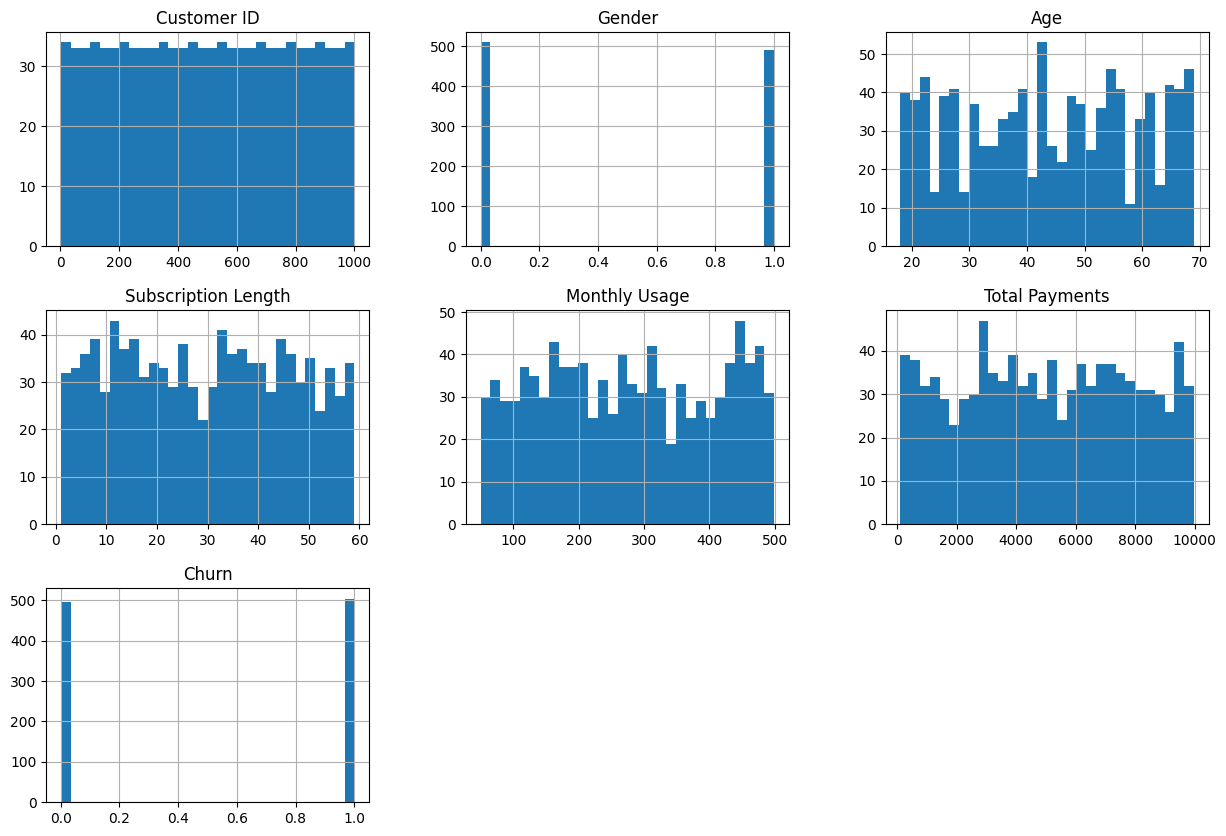

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(15, 10))
plt.show()

Identifying correlation between variable and churn

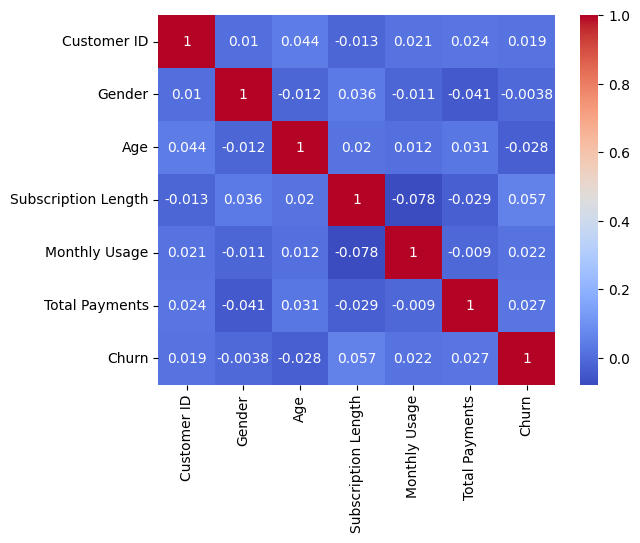

Churn                  1.000000
Subscription Length    0.056790
Total Payments         0.026813
Monthly Usage          0.022159
Customer ID            0.019483
Gender                -0.003841
Age                   -0.027595
Name: Churn, dtype: float64


In [29]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

print(corr_matrix['Churn'].sort_values(ascending=False))

Model Building and spliting train and test 

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop(['Customer ID', 'Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Training the Model. Applyinf RandomForest Classifier and generate prediction

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Evaluate the model

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.51
Precision: 0.52
Recall: 0.45
F1-Score: 0.48


Model Interpretation (Feature importance)

               feature  importance
4       Total Payments    0.272684
3        Monthly Usage    0.262058
1                  Age    0.214874
2  Subscription Length    0.213482
0               Gender    0.036902


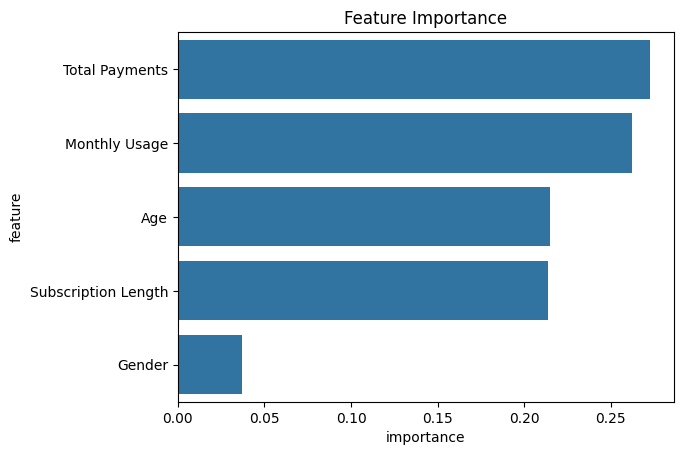

In [33]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame(
    {'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False)
print(feature_importance_df)

sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

#### Summary:
 I tried to build a sample dataset for this chanllenge. This dataset does not contain missing values. If there will be they will be dropped. The other startegy is imputation which can be applied as well.  Then i applied another data preprocessing step i.e. encoding categorical variables. After that explorator data analysis, then model building and interpretation.

#### Recommendation: 
 * With more dataset size, we can have better accuracy as well we can try for imputation
 * Based on the model's feature importance analysis, key factors influencing churn predictions include 'Subscription Length,' 'Monthly Usage,' and 'Total Payments.' 
 * Customers with shorter subscription lengths, lower monthly usage, and lower total payments are more likely to churn, indicating their reduced engagement and satisfaction with the service.
 * To reduce customer churn, concentrate on short subscription lengths and low monthly usage, offerings.  Additionally, providing loyalty rewards or discounts for long-term subscriptions